In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Import Keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

/home/gevaertw/tensorflow2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


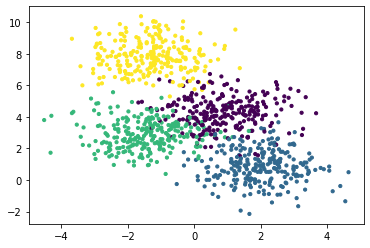

In [3]:
# Data generation (4 classes)

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=1000, centers=4, center_box = [-10,10],
                  random_state=0, cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], s=10,c=y);

In [5]:
# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

# ---------------------------------------------------
# Normalization

#scaler = StandardScaler()

#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

#----------------------------------------------------
# one-hot encoding of the targets
y_train = to_categorical(y_train)
print(y_train)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [9]:
# NN parameters

batch_size = 10
epochs = 100
dropoutrate = 0.1
input_dim = X_train.shape[1]
activation_hidden = 'relu' # Activation function of the hidden layer neurons
activation_output = 'softmax'# Activation function of the output layer neurons
initializer = 'RandomUniform' # Weight initializer
SGD = tf.keras.optimizers.SGD(lr=0.1)
adam = tf.keras.optimizers.Adam()

model = Sequential()
model.add(Dense(1000, input_dim=input_dim, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
model.add(Dense(1000, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
model.add(Dense(1000, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
model.add(Dense(1000, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
model.add(Dense(1000, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
model.add(Dense(y_train.shape[1], kernel_initializer=initializer,activation=activation_output))


model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

# train the model

history = model.fit(X_train, y_train, validation_split=0.3,epochs=epochs, verbose=1,batch_size=batch_size)

Epoch 1/100
56/56 [==============================] - 1s 12ms/step - loss: 0.7314 - accuracy: 0.7054 - val_loss: 0.4498 - val_accuracy: 0.8125
Epoch 2/100
56/56 [==============================] - 1s 10ms/step - loss: 0.4051 - accuracy: 0.8571 - val_loss: 0.4949 - val_accuracy: 0.7792
Epoch 3/100
56/56 [==============================] - 1s 10ms/step - loss: 0.3635 - accuracy: 0.8732 - val_loss: 0.2702 - val_accuracy: 0.8958
Epoch 4/100
56/56 [==============================] - 1s 10ms/step - loss: 0.3131 - accuracy: 0.8893 - val_loss: 0.3275 - val_accuracy: 0.8792
Epoch 5/100
56/56 [==============================] - 1s 10ms/step - loss: 0.2751 - accuracy: 0.8929 - val_loss: 0.2927 - val_accuracy: 0.9167
Epoch 6/100
56/56 [==============================] - 1s 10ms/step - loss: 0.3308 - accuracy: 0.8964 - val_loss: 0.3078 - val_accuracy: 0.8833
Epoch 7/100
56/56 [==============================] - 1s 10ms/step - loss: 0.3488 - accuracy: 0.9036 - val_loss: 0.2658 - val_accuracy: 0.8958
Epoch 

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              3000      
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1000)             

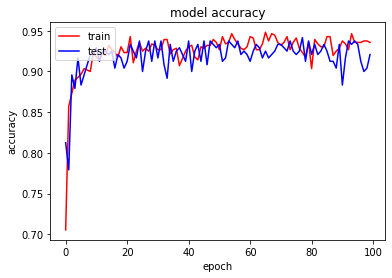

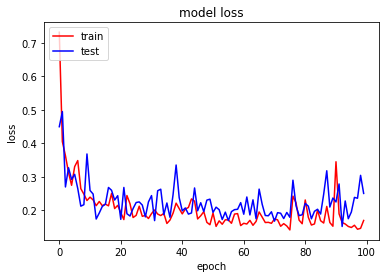

In [15]:
# Plot history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


(-4.14847939486199, 12.251520605138023)

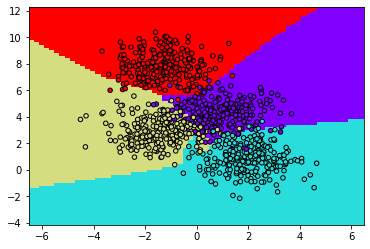

In [17]:
# Plot of the decision boundary

h = 0.2
x1_min = X[:,0].min()-2
x1_max = X[:,0].max()+2
x2_min = X[:,1].min()-2
x2_max = X[:,1].max()+2
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))

xy = np.vstack([xx.ravel(), yy.ravel()]).T

xys = xy
#xys = scaler.transform(xy)

Zn = model.predict_classes(xys).reshape(xx.shape)

plt.pcolormesh(xx,yy, Zn,cmap='rainbow')
plt.scatter(X[:, 0], X[:, 1], c=y,edgecolor='k', s=20,cmap='rainbow')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [18]:
# Testing

y_pred = model.predict_classes(X_test)
print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100) 



              precision    recall  f1-score   support

           0       0.82      0.75      0.79        44
           1       0.94      0.98      0.96        51
           2       0.84      0.88      0.86        48
           3       0.96      0.96      0.96        57

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200

[[33  2  7  2]
 [ 1 50  0  0]
 [ 5  1 42  0]
 [ 1  0  1 55]]
90.0
